# 3D examples to post-process the pressure for incompressible flow

In [1]:
from trustutils import run 

run.introduction("MR")
run.description("This report was made to show how to post-process the pressure field with TRUST. The idea is to know what is coded behind the keywords: pression, pression_Pa, pressure, P_star, pression_hydrostatique on an analytic case. At last, you can find a part about how to post-process the total pressure.")
run.TRUST_parameters("1.7.6")

## Introduction 
 Validation made by : MR



 Report generated 24/01/2022

### Description 
This report was made to show how to post-process the pressure field with TRUST. The idea is to know what is coded behind the keywords: pression, pression_Pa, pressure, P_star, pression_hydrostatique on an analytic case. At last, you can find a part about how to post-process the total pressure.

### TRUST parameters 
 * Version TRUST: 1.7.6
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/HowTo/Postprocessed_Pressure/build)

In [2]:
from trustutils import run 
c1 = run.addCase("PAR_VEF_P0P1_g_muscl","PAR_VEF_P0P1_g_muscl.data",nbProcs=3)
c2 = run.addCase("PAR_VEF_P0P1_g_negligeable","PAR_VEF_P0P1_g_negligeable.data",nbProcs=3)
c3 = run.addCase("PAR_VEF_P0P1_g_ef_stab","PAR_VEF_P0P1_g_ef_stab.data",nbProcs=3)
c4 = run.addCase("PAR_VEF_P0P1_gx_muscl","PAR_VEF_P0P1_gx_muscl.data",nbProcs=3)
c5 = run.addCase("PAR_VEF_P0P1_gx_ef_stab","PAR_VEF_P0P1_gx_ef_stab.data",nbProcs=3) 
c6 = run.addCase("PAR_VEF_P0P1_gx_negligeable","PAR_VEF_P0P1_gx_negligeable.data",nbProcs=3) 
run.printCases()
run.runCases()

### Test cases 
* PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.data : 
* PAR_VEF_P0P1_g_negligeable/PAR_VEF_P0P1_g_negligeable.data : 
* PAR_VEF_P0P1_g_ef_stab/PAR_VEF_P0P1_g_ef_stab.data : 
* PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl.data : 
* PAR_VEF_P0P1_gx_ef_stab/PAR_VEF_P0P1_gx_ef_stab.data : 
* PAR_VEF_P0P1_gx_negligeable/PAR_VEF_P0P1_gx_negligeable.data : 


Running **with Sserver**...
  => A total of 6 cases were (successfully) run in 925.5s.


## General informations

### Poiseuille flow

Consider a laminar flow ($Re<2000$) of a fluid of viscosity $\mu$ and density $\rho$, in a cylindrical pipe of radius $R=0.1$, placed horizontally. The next graph explains this configuration and m       akes it possible to define a cylindrical reference mark whose axis of revolution is that of the pipe and corresponds to the direction of the laminar flow. 

<img src="build/fig.png">

Under these conditions, since the flow is laminar, the velocity vector at every point is written: 

$$\vec{V}=v_r \vec{e}_r + v_{\theta} \vec{e}_{\theta} + v_x\vec{e}_x=u(r,\theta,x) \vec{e}_x$$ 

as here $v_r=v_{\theta}=0$. 

Then in cylindrical coordinates: 

$$ \nabla \cdot \vec{V} = 0 = \frac{1}{r} \frac{\partial (r v_r)}       {\partial r} + \frac{1}{r} \frac{\partial v_{\theta}}{\partial \theta} + \frac{\partial v_x}{\partial x} = \frac{\partial u}{\partial x}=0$$ 

So $ \vec{V}=u(r,\theta) \vec{e}_x $. And by symmetry of revolution $ \frac{\partial v_{\theta}}{\partial \theta} =0 $ so: 

$$ \vec{V}=u(r) \vec{e}_x$$ 

Now take the equation governing the evolution of the total pressure $P_t(=p+\rho g z + \frac{1}{2}\rho v^2)$ along a laminar flow oriented along the axis $x$: 

$$\frac{dP_t}{dx}=\mu \Delta u$$  

And develop the expression of the Laplacian taking into account the    fact that $u$ depends only on $x$: 

$$\frac{dP_t}{dx}=\mu \frac{1}{r} \frac{\partial}{\partial r} \left(r \frac{\partial u}{\partial r}\right)$$ 

Where the left-hand term depends only on $x$ and on the right-hand side only $r$. It follows that the members of this equation are equal to the same constant K. Thus, we have: 

$\displaystyle{\frac{dP_t}{dx}=K}$ reflecting the regular pressure drop;

$\displaystyle{\mu \frac{1}{r} \frac{\partial}{\partial r} \left(r \frac{\partial u}{\partial r}\right)}$ allowing the determination of the velocity profile.

Solving the second equation, we have: 

$$u(r)=\frac{K}{4 \mu} r^2 + K^{'} ln(r) + K^{''}$$ 

Using $u(r=R)=0$ and $u(r=0)=u_{max}$ then: 

$$u(r)=\frac{K}{4 \mu} (r^2-R^2)$$ 

And we can write $u_{max}=u(0)=-\frac{KR^2}{4\mu}$ so 

$$K=-\frac{4 \mu}{R^2} u_{max}$$ 

The average velocity $V_{moy}=<u>$ can be expressed in function of the volume flow rate $Q_v$: 

$$<u>=\frac{Q_v}{S}=\frac{1}{\pi R^2} \iint V \cdot \vec{n} dS = \frac{1}{\pi R^2} \iint u(r) dS=\frac{1}{\pi R^2} \int_0^R u(r) 2 \pi r dr= -\frac{KR^2}{8\mu}=-\frac{u_{max}}{2}$$ 

with $S=\pi R^2$ so $dS=2\pi r dr$. So $\displaystyle{Q_v=<u> S=<u>\pi R^2 =-\frac{K \pi R^4}{8 \mu}}$.

Then $\displaystyle{\frac{dP_t}{dx}=K}$ leads to: 

$$\Delta P_t =-\frac{dP_t}{dx} \Delta x=-K \Delta x= \frac{8 \mu <u> L}{R^2}$$ 

with $L=\Delta x$ the length of the pipe.

Set $D=2R$ the height of the pipe (diameter) and $v=<u>$ the average velocity, then: 

$$\Delta P_t=\frac{8 \mu v L}{(D/2)^2}=\left(\frac{1}{2}\rho v^2\right)\left(\frac{64 \mu}{\rho v D}\right)\frac{L}{D} = \left(\frac{1}{2}\rho v^2\right)\left(\frac{64}{Re}\right)\frac{L}{D}$$

with $Re=\frac{\rho v D}{\mu}$ the Reynolds number where $\lambda=\frac{64}{Re}$ is the coefficient of pressure loss.

Reference: http://res-nlp.univ-lemans.fr/NLP_C_M02_G02/co/Contenu_29.html

### Geometry used: VEF mesh

Here we made calculs on a column of water. 

Inlet mesh done with gmsh then extrude with TRUST.

In [75]:
run.dumpData("PAR_VEF_P0P1_g_muscl/nb_elem_tot.txt")

 Total number of elements = 71232



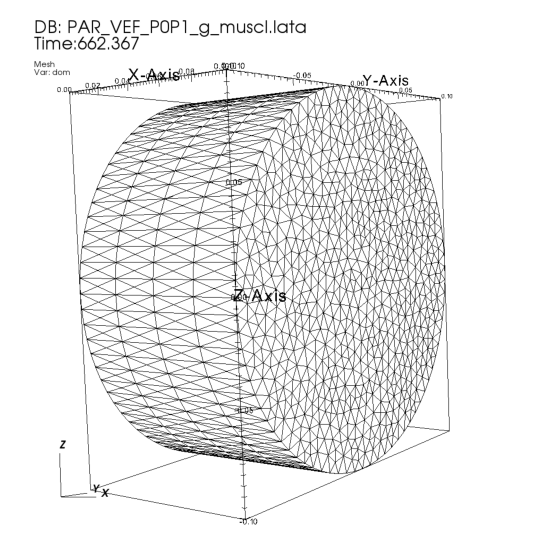

In [3]:
from trustutils import visit

a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata",'Mesh','dom')
a.normal3D([0.6,-0.81,0.07])
a.up3D([-0.01,0.08,1])
a.plot()


### Probes localisation on Inlet and Outlet boundaries

The meshes are the same on the Inlet and Outlet. 



Coordinates of the <font color='red'>red</font> probe: 

In [77]:
run.dumpData("PAR_VEF_P0P1_g_muscl/probe1.txt")

 x= 0.00000000e+00 y= -3.35372631e-04 z= -2.89921075e-04



Coordinates of the <font color='green'>green</font> probe:

In [78]:
run.dumpData("PAR_VEF_P0P1_g_muscl/probe2.txt")

 x= 0.00000000e+00 y= -2.12652670e-02 z= -2.64793222e-02



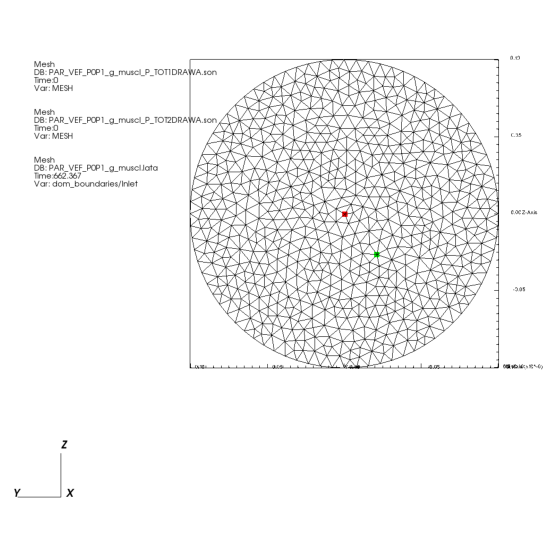

In [4]:
from trustutils import visit

a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_P_TOT1DRAWA.son","Mesh","MESH")
a.normal3D([-1,0.,0.])
a.up3D([0.,0.,1])
a.zoom3D([0.15,0.15,0.8])
a.meshColor("red")
a.visitCommand('MeshAtts.pointSizePixels=10')
a.visitCommand('SetPlotOptions(MeshAtts)')
a.addField("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_P_TOT2DRAWA.son","Mesh","MESH")
a.meshColor("green")
a.visitCommand('MeshAtts.pointSizePixels=10')
a.visitCommand('SetPlotOptions(MeshAtts)')
a.addField("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Mesh","dom_boundaries/Inlet")
a.plot()


### Physical properties of the fluid


In [5]:
from trustutils import plot

a = plot.Table([""])
data = plot.loadText("PAR_VEF_P0P1_g_muscl/propertiesGeometry.dat")
a.addLigne([data[1]],'Density $\rho$ ($kg/m^3$)')
a.addLigne([data[0]],'Dynamic viscosity $\mu$ ($kg/(m.s)$)')
a.df

,
Density $\rho$ ($kg/m^3$),1000.000000
Dynamic viscosity $\mu$ ($kg/(m.s)$),0.001002


### Flow characteristics


In [6]:
a = plot.Table([""])
data = plot.loadText("PAR_VEF_P0P1_g_muscl/propertiesGeometry.dat")
a.addLigne([data[2]],'u_{max}')
a.addLigne([data[3]],'u_{moy}')
a.addLigne([data[5]],'Reynolds number $Re$')
a.addLigne([data[4]],'Theoretical volume flow rate $Q_v$')
a.addLigne([data[6]],'$\Delta P$ theoretical')
a.df

,
u_{max},0.010000
u_{moy},0.005000
Reynolds number $Re$,998.000000
Theoretical volume flow rate $Q_v$,0.000157
$\Delta P$ theoretical,0.000401


### Initial conditions

In [5]:
from trustutils import run
run.dumpData('IC.txt',
            ["initial_conditions", 
              "boundary_conditions", 
              "vitesse", 
              "Champ_Uniforme", 
              "paroi_fixe", 
              "Frontiere_ouverte_vitesse_imposee", 
              "Champ_front_Uniforme", 
              "Frontiere_ouverte_pression_imposee"])

 initial_conditions  { vitesse Champ_Uniforme 3 0 0 0 }



### Boundary conditions

In [6]:
from trustutils import run
run.dumpData('CL.txt',
             ["initial_conditions", 
              "boundary_conditions", 
              "vitesse", 
              "Champ_Uniforme", 
              "paroi_fixe", 
              "Frontiere_ouverte_vitesse_imposee", 
              "Champ_front_Uniforme", 
              "Frontiere_ouverte_pression_imposee"])

 boundary_conditions 
 {
 # Vmax 0.01 #
 Inlet  Frontiere_ouverte_vitesse_imposee  Champ_front_fonc_xyz 3 
 (y^2+z^2<0.01)*(-(0.01/0.1^2)*(y^2+z^2-0.1^2))  0.  0.
 Outlet Frontiere_ouverte_pression_imposee  Champ_front_Uniforme 1 10.
 Wall   paroi_fixe
 }



## Cylinder belong z axis and $\vec{g}=-g \vec{e}_z$ 

### Gravity vector

In [8]:
run.dumpData('gravity.txt',
            ["Champ_Uniforme", 
              "Read"])

 Champ_Uniforme gravite
 Read gravite 3   0.   0.   -9.81



### Initial state: Velocity field

We impose in inlet: $$u(r)=\frac{K}{4 \mu} \left(r^2-R^2\right)=-\frac{u_{max}}{R^2} \left(r^2-R^2\right)$$ with $u_{max}=u(0)=0.01$, $R=0.1$ and $r=y^2+z^2$

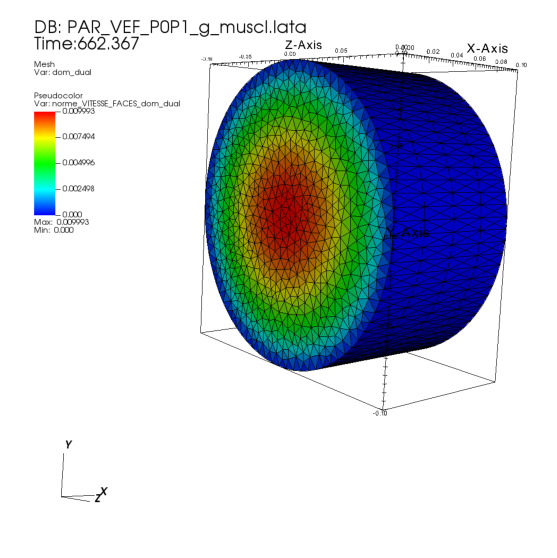

In [10]:
a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Pseudocolor","norme_VITESSE_FACES_dom_dual",mesh="dom_dual")
a.up3D([0, 1, -0.08])
a.normal3D([-0.65,0.1,0.75])
a.zoom3D([0.15,0.15,0.8])
a.plot()

### Initial state: Pressure field

The imposed pressure in boundary condition correspond to the TRUST field named 'Pressure'.This is the Navier-Stokes pressure $P_{NS}$ in Pascals (for incompressible flow):

   **$P_{NS}$ ='Pression\_Pa'='Pressure' in [Pa]**.

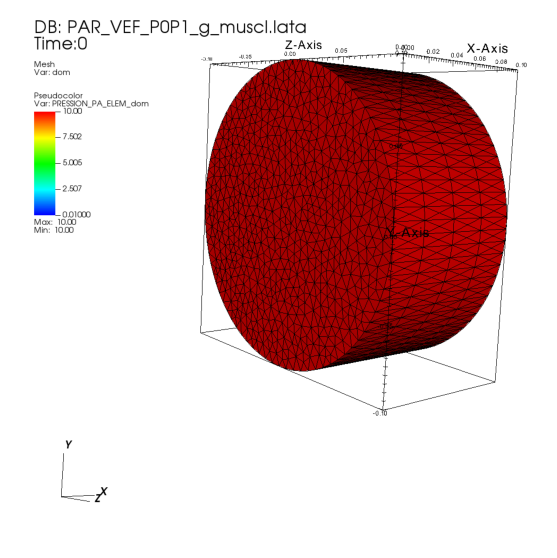

In [11]:
a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Pseudocolor","PRESSION_PA_ELEM_dom",time=0,min=0.01,max=10)
a.up3D([0, 1, -0.08])
a.normal3D([-0.65,0.1,0.75])
a.zoom3D([0.15,0.15,0.8])
a.plot()

and: **'Pression' = 'P\_star' = $ \frac{1}{\rho} P_{NS}$ in $[m^2/s^2]$**. 

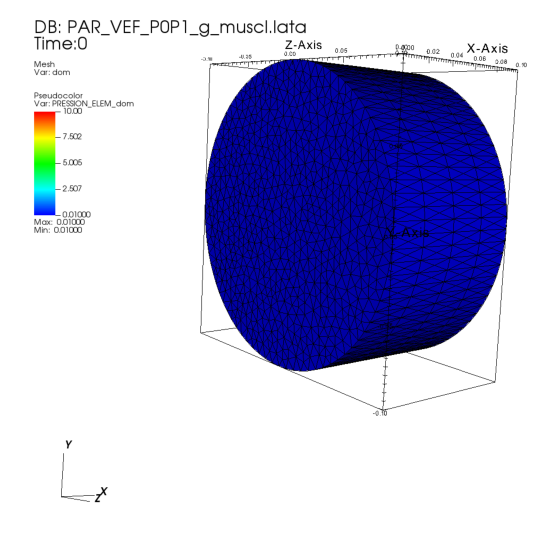

In [12]:
a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Pseudocolor","PRESSION_ELEM_dom",time=0,min=0.01,max=10)
a.up3D([0, 1, -0.08])
a.normal3D([-0.65,0.1,0.75])
a.zoom3D([0.15,0.15,0.8])
a.plot()

### Mean of the pressure field at the Outlet

We want to verify the pressure at the outlet of the cylinder where we imposed the pressure field to be 10. For that we create a new field with the 'Definition_champ' TRUST keyword. 

Syntax of the Definition_champ block for the mean of the 'pression' field on the outlet in the data

In [9]:
run.dumpData("mean_pression_outlet.txt",
            ["Reduction_0D", 
             "methode", 
             "moyenne", 
             "source", 
             "interpolation", 
             "domaine", 
             "localisation", 
             "elem", 
             "refChamp",
             "Pb_champ, pression", 
             "pression_pa"])

 mean_PRESSION_Outlet Reduction_0D {
 methode average
 source interpolation {
 domaine dom_boundaries_Outlet
 localisation elem 
 source refChamp { Pb_champ pb pression }
 }
 }



In [10]:
run.dumpData("mean_pression_outlet_probe.txt",["periode", "numero_elem_sur_maitre"])

 mean_PRESSION_Outlet mean_PRESSION_Outlet periode 5 numero_elem_sur_maitre 0



The obtained values confirm that Navier-stokes pressure 

**$P_{NS}$ ='Pression\_Pa'='Pressure'** in [Pa] and **'Pression' = 'P\_star' = $ \frac{1}{\rho} P_{NS}$** in $[m^2/s^2]$ 

In [15]:
from trustutils import plot

a = plot.Table([""])
data = plot.loadText("PAR_VEF_P0P1_g_muscl/mean_pressure.dat")
a.addLigne([data[1]],"Mean 'Pression_Pa' field in Pascals")
a.addLigne([data[2]],"Mean 'Pressure' field in Pascals")
a.addLigne([data[0]],"Mean 'Pression' field in $[m^2/s^2]$")
a.addLigne([data[3]],"Mean 'P_Star' field in $[m^2/s^2]$")
a.df

,
Mean 'Pression_Pa' field in Pascals,10.00
Mean 'Pressure' field in Pascals,10.00
Mean 'Pression' field in $[m^2/s^2]$,0.01
Mean 'P_Star' field in $[m^2/s^2]$,0.01


### Flow rate

In [1]:
from trustutils import plot

a = plot.Table(["Theoretical volume flow rate","TRUST volume flow rate","Error on $Q_v$ in %"])

data = plot.loadText("PAR_VEF_P0P1_g_muscl/propertiesGeometry.dat")
a.addLigne([[data[4],data[15],data[16]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_g_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[4],data[15],data[16]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_g_negligeable/propertiesGeometry.dat")
a.addLigne([[data[4],data[15],data[16]]],"Negligeable")

a.df

,Theoretical volume flow rate,TRUST volume flow rate,Error on $Q_v$ in %
muscl,0.000157,0.000157,0.10478
Ef_Stab,0.000157,0.000157,0.10478
Negligeable,0.000157,0.000157,0.10478


<!-- ### Velocity slice belong Y axis -->

In [11]:
# from trustutils import visit

# a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Pseudocolor","norme_VITESSE_FACES_dom_dual",mesh="dom_dual")
# a.up3D([0, 1, -0.08])
# a.normal3D([-0.65,0.1,0.75])
# a.slice(origin=[0,0,0],normal=[0,1,0])
# a.plot()

### Velocity profile for a Poiseuille flow at final time step for $x=0.05$

In [13]:
from trustutils import run
run.dumpData("VITX_probe.txt",["vitesseX", "segment", "periode"])

 vitX vitesseX periode 20 segment 22 0.01 0. -0.1 0.01 0. 0.1



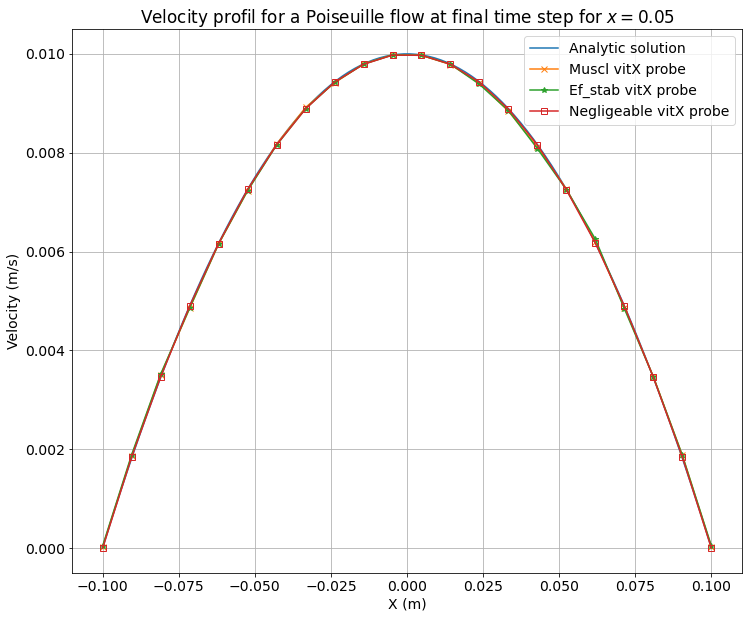

In [35]:
import numpy as np

a = plot.Graph("Velocity profil for a Poiseuille flow at final time step for $x=0.05$")
x = np.linspace(-0.1,0.1,100)
y = -0.01*(x*x-0.1*0.1)/(0.1*0.1)
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_VITX.son",compo=0,label="Muscl vitX probe",marker="-x")
a.addSegment("PAR_VEF_P0P1_g_ef_stab/PAR_VEF_P0P1_g_ef_stab_VITX.son",compo=0,label="Ef_stab vitX probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_g_negligeable/PAR_VEF_P0P1_g_negligeable_VITX.son",compo=0,label="Negligeable vitX probe",marker='-s',mfc='None')
a.label("X (m)","Velocity (m/s)")

<!-- ### Pressure slice belong Y axis -->

In [14]:
# a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Pseudocolor","PRESSURE_TOT_ELEM_dom")
# a.up3D([0, 1, -0.08])
# a.normal3D([-0.65,0.1,0.75])
# a.slice(origin=[0,0,0],normal=[0,1,0])
# a.plot()

### Total pressure profile

Here we don't concider the hydrostatic pressure because in this configuration, the gravity pushes the flow.

In [32]:
run.dumpData("pression_tot.txt",
            ["Predefini", 
             "Transformation", 
             "methode", 
             "formule", 
             "expression", 
             "localisation", 
             "elem", 
             "sources_reference", 
             "energie_cinetique_elem", 
             "sources", 
             "RefChamp", 
             "Pb_champ", 
             "pression_pa", 
             "nom_source", 
             "pression_hydrostatique", 
             "masse_volumique"])

 energie_cine_elem Predefini { Pb_champ pb energie_cinetique_elem }
 pressure_tot Transformation
 {
 methode formule expression 1 p_pa+p_hydro+energie_cine_elem
 localisation elem
 sources_reference { energie_cine_elem }
 sources 
 {
 RefChamp { Pb_champ pb pression_pa  nom_source p_pa } ,
 RefChamp { Pb_champ pb masse_volumique  nom_source rho } ,
 RefChamp { Pb_champ pb pression_hydrostatique   nom_source p_hydro }
 }
 }



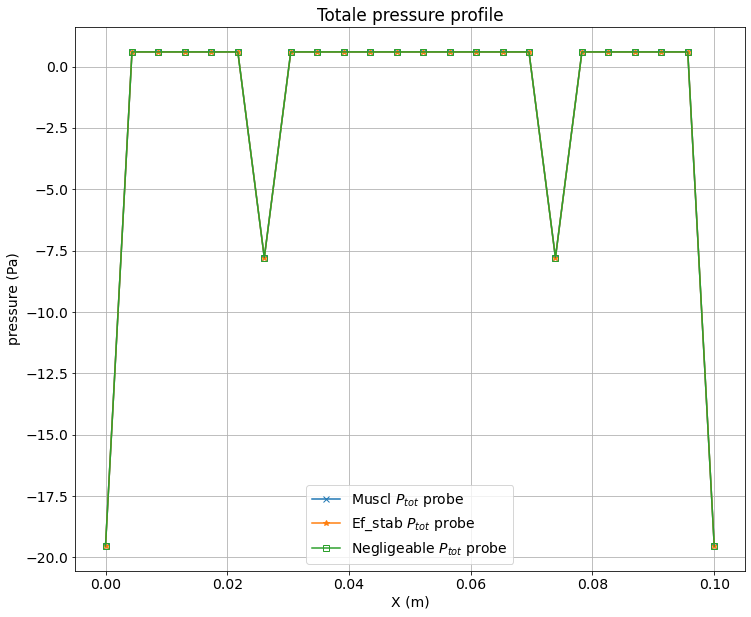

In [39]:
from trustutils import plot

a = plot.Graph("Totale pressure profile")

a.addSegment("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_PTOT.son",label="Muscl $P_{tot}$ probe",marker="-x")
a.addSegment("PAR_VEF_P0P1_g_ef_stab/PAR_VEF_P0P1_g_ef_stab_PTOT.son",label="Ef_stab $P_{tot}$ probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_g_negligeable/PAR_VEF_P0P1_g_negligeable_PTOT.son",label="Negligeable $P_{tot}$ probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Pressure profil

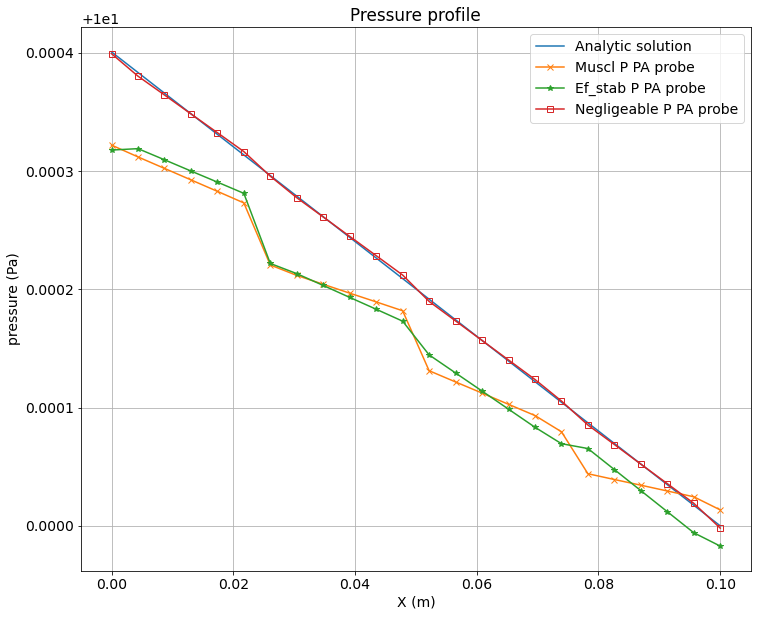

In [19]:
a = plot.Graph("Pressure profile")
x = np.linspace(0,0.1,100)
y = -4*0.001002*0.01*(x-0.1)/(0.1*0.1)+10
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_P_PA.son",label="Muscl P PA probe",marker='-x')
a.addSegment("PAR_VEF_P0P1_g_ef_stab/PAR_VEF_P0P1_g_ef_stab_P_PA.son",label="Ef_stab P PA probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_g_negligeable/PAR_VEF_P0P1_g_negligeable_P_PA.son",label="Negligeable P PA probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Pressure hydrostatique profil

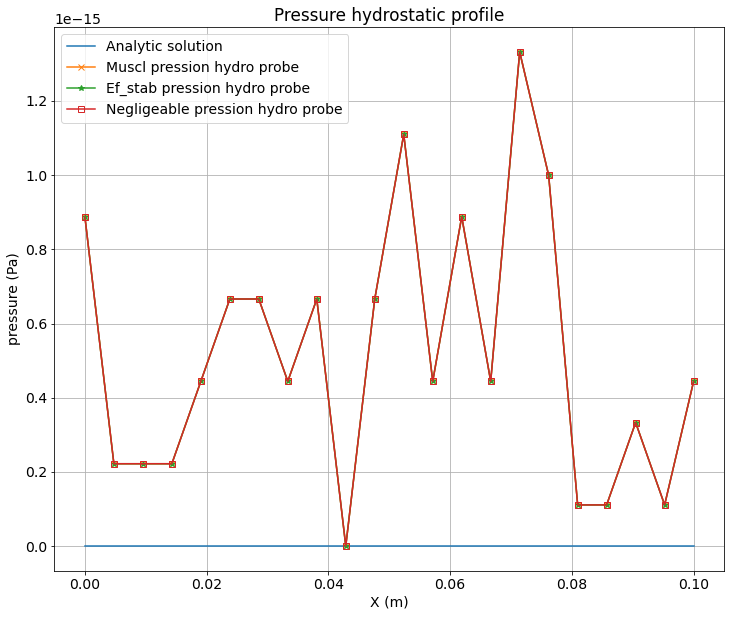

In [20]:
a = plot.Graph("Pressure hydrostatic profile")
x = np.linspace(0,0.1,100)
y = 0.*x
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_PRESSION_HYDRO.son",label="Muscl pression hydro probe",marker='-x')
a.addSegment("PAR_VEF_P0P1_g_ef_stab/PAR_VEF_P0P1_g_ef_stab_PRESSION_HYDRO.son",label="Ef_stab pression hydro probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_g_negligeable/PAR_VEF_P0P1_g_negligeable_PRESSION_HYDRO.son",label="Negligeable pression hydro probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Kinetic energy profile

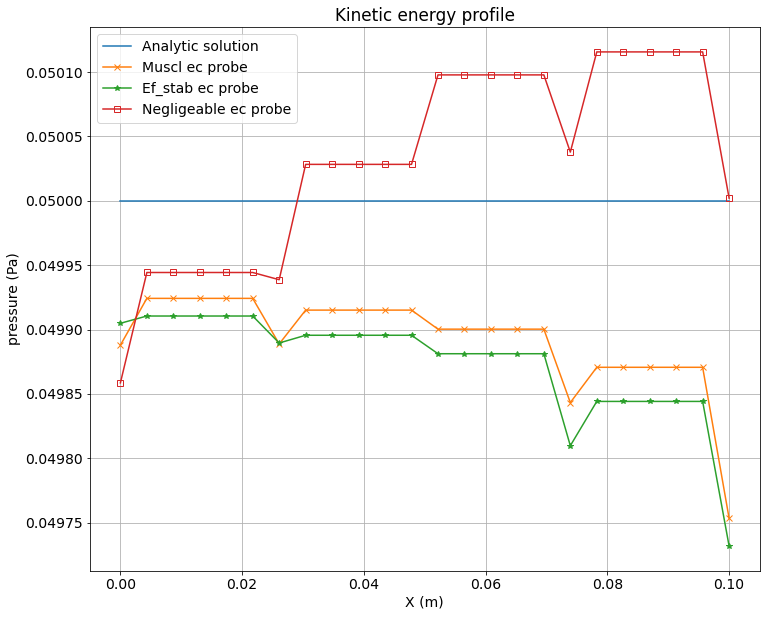

In [21]:
a = plot.Graph("Kinetic energy profile")
x = np.linspace(0,0.1,100)
y = [0.05]*100
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl_EC.son",label="Muscl ec probe",marker='-x')
a.addSegment("PAR_VEF_P0P1_g_ef_stab/PAR_VEF_P0P1_g_ef_stab_EC.son",label="Ef_stab ec probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_g_negligeable/PAR_VEF_P0P1_g_negligeable_EC.son",label="Negligeable ec probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Pressure drop on the mean of the pressure at the inlet and outlet

In [22]:
from trustutils import plot

a = plot.Table(["$\Delta P$ Theoretical","$\Delta P$ TRUST","Error on $\Delta P$ in %"])

data = plot.loadText("PAR_VEF_P0P1_g_muscl/propertiesGeometry.dat")
a.addLigne([[data[6],data[13],data[14]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_g_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[6],data[13],data[14]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_g_negligeable/propertiesGeometry.dat")
a.addLigne([[data[6],data[13],data[14]]],"Negligeable")

a.df

,$\Delta P$ Theoretical,$\Delta P$ TRUST,Error on $\Delta P$ in %
muscl,0.000401,0.000392,2.0958
Ef_Stab,0.000401,0.000355,11.5270
Negligeable,0.000401,0.000351,12.5250


### Pressure drop between the two symmetrical points of the probe 1

In [23]:
from trustutils import plot

a = plot.Table(["$\Delta P$ Theoretical","$\Delta P$ TRUST","Error on $\Delta P$ in %"])

data = plot.loadText("PAR_VEF_P0P1_g_muscl/propertiesGeometry.dat")
a.addLigne([[data[6],data[7],data[8]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_g_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[6],data[7],data[8]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_g_negligeable/propertiesGeometry.dat")
a.addLigne([[data[6],data[7],data[8]]],"Negligeable")

a.df

,$\Delta P$ Theoretical,$\Delta P$ TRUST,Error on $\Delta P$ in %
muscl,0.000401,0.000434,8.2585
Ef_Stab,0.000401,0.000497,23.9270
Negligeable,0.000401,0.000235,41.3420


### Pressure drop between the two symmetrical points of the probe 3

In [24]:
from trustutils import plot

a = plot.Table(["$\Delta P$ Theoretical","$\Delta P$ TRUST","Error on $\Delta P$ in %"])

data = plot.loadText("PAR_VEF_P0P1_g_muscl/propertiesGeometry.dat")
a.addLigne([[data[6],data[11],data[12]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_g_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[6],data[11],data[12]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_g_negligeable/propertiesGeometry.dat")
a.addLigne([[data[6],data[11],data[12]]],"Negligeable")

a.df

,$\Delta P$ Theoretical,$\Delta P$ TRUST,Error on $\Delta P$ in %
muscl,0.000401,0.000377,5.9381
Ef_Stab,0.000401,0.000463,15.5190
Negligeable,0.000401,0.000267,33.3830


## Cylinder belong x axis and $\vec{g}=-g \vec{e}_x$ 

### Gravity vector

In [26]:
run.dumpData('gravity_gx.txt',
             ["Champ_Uniforme", 
              "Read"])

 Champ_Uniforme gravite
 Read gravite 3   -9.81   0.   0.



### Initial state: Velocity field

We impose in inlet: $$u(r)=-\frac{u_{max}}{R^2} \left(r^2-R^2\right)$$ with $u_{max}=u(0)=0.01$, $R=0.1$ and $r=y^2+z^2$

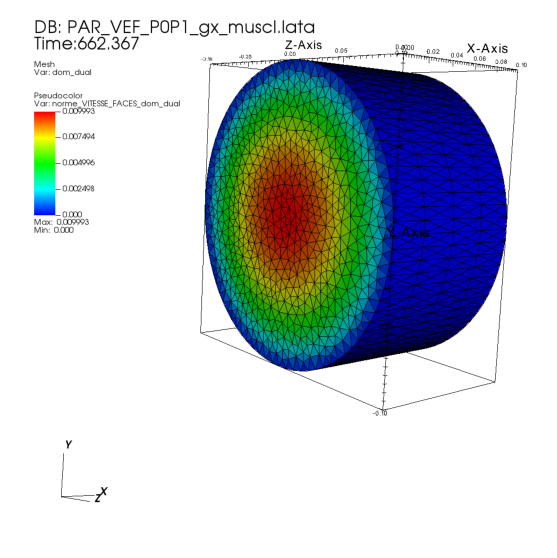

In [56]:
a = visit.Show("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl.lata","Pseudocolor","norme_VITESSE_FACES_dom_dual",mesh="dom_dual")
a.up3D([0, 1, -0.08])
a.normal3D([-0.65,0.1,0.75])
a.zoom3D([0.15,0.15,0.8])
a.plot()

### Initial state: Pressure field

The imposed pressure in boundary condition correspond to the TRUST field named 'Pressure'.This is the Navier-Stokes pressure $P_{NS}$ in Pascals (for incompressible flow):

   **$P_{NS}$ ='Pression\_Pa'='Pressure' in [Pa]**.
   
<!--    and: **'Pression' = 'P\_star' = $ \frac{1}{\rho} P_{NS}$ in $[m^2/s^2]$** -->

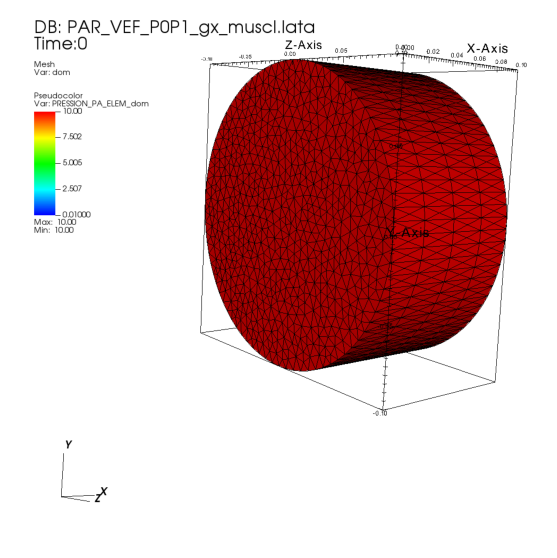

In [57]:
a = visit.Show("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl.lata","Pseudocolor","PRESSION_PA_ELEM_dom",time=0,min=0.01,max=10)
a.up3D([0, 1, -0.08])
a.normal3D([-0.65,0.1,0.75])
a.zoom3D([0.15,0.15,0.8])
a.plot()

and: **'Pression' = 'P\_star' = $ \frac{1}{\rho} P_{NS}$ in $[m^2/s^2]$**. 

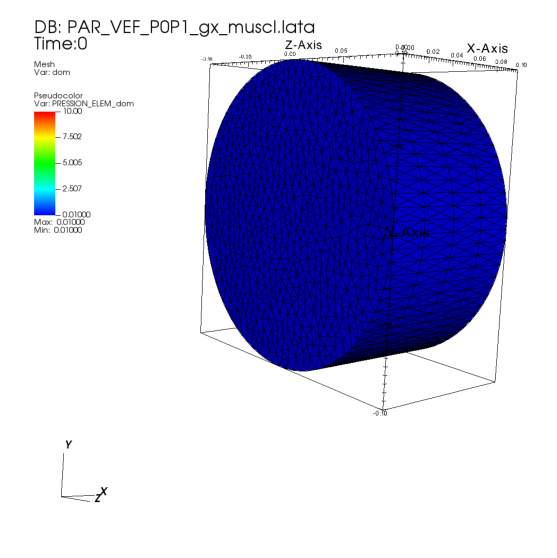

In [58]:
a = visit.Show("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl.lata","Pseudocolor","PRESSION_ELEM_dom",time=0,min=0.01,max=10)
a.up3D([0, 1, -0.08])
a.normal3D([-0.65,0.1,0.75])
a.zoom3D([0.15,0.15,0.8])
a.plot()

### Mean of the pressure field at the Outlet

We want to verify the pressure at the outlet of the cylinder where we imposed the pressure field to be 10. For that we create a new field with the 'Definition_champ' TRUST keyword. 

Syntax of the Definition_champ block for the mean of the 'pression' field on the outlet in the data

In [27]:
run.dumpData("mean_pression_outlet.txt",
            ["Reduction_0D", 
             "methode", 
             "moyenne", 
             "source", 
             "interpolation", 
             "domaine", 
             "localisation", 
             "elem", 
             "refChamp",
             "Pb_champ, pression", 
             "pression_pa"])

 mean_PRESSION_Outlet Reduction_0D {
 methode average
 source interpolation {
 domaine dom_boundaries_Outlet
 localisation elem 
 source refChamp { Pb_champ pb pression }
 }
 }



In [28]:
run.dumpData("mean_pression_outlet_probe.txt",["periode", "numero_elem_sur_maitre"])

 mean_PRESSION_Outlet mean_PRESSION_Outlet periode 5 numero_elem_sur_maitre 0



The obtained values confirm that Navier-stokes pressure 

**$P_{NS}$ ='Pression\_Pa'='Pressure'** in [Pa] and **'Pression' = 'P\_star' = $ \frac{1}{\rho} P_{NS}$** in $[m^2/s^2]$ 

In [29]:
from trustutils import plot

a = plot.Table([""])
data = plot.loadText("PAR_VEF_P0P1_gx_muscl/mean_pressure.dat")
a.addLigne([data[1]],"Mean 'Pression_Pa' field in Pascals")
a.addLigne([data[2]],"Mean 'Pressure' field in Pascals")
a.addLigne([data[0]],"Mean 'Pression' field in $[m^2/s^2]$")
a.addLigne([data[3]],"Mean 'P_Star' field in $[m^2/s^2]$")
a.df

,
Mean 'Pression_Pa' field in Pascals,10.00
Mean 'Pressure' field in Pascals,10.00
Mean 'Pression' field in $[m^2/s^2]$,0.01
Mean 'P_Star' field in $[m^2/s^2]$,0.01


### Flow rate

In [30]:
from trustutils import plot

a = plot.Table(["Theoretical volume flow rate","TRUST volume flow rate","Error on $Q_v$ in %"])

data = plot.loadText("PAR_VEF_P0P1_gx_muscl/propertiesGeometry.dat")
a.addLigne([[data[4],data[15],data[16]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_gx_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[4],data[15],data[16]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_gx_negligeable/propertiesGeometry.dat")
a.addLigne([[data[4],data[15],data[16]]],"Negligeable")

a.df

,Theoretical volume flow rate,TRUST volume flow rate,Error on $Q_v$ in %
muscl,0.000157,0.000157,0.10478
Ef_Stab,0.000157,0.000157,0.10478
Negligeable,0.000157,0.000157,0.10478


<!-- ### Velocity slice belong Y axis -->

In [61]:
# from trustutils import visit

# a = visit.Show("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl.lata","Pseudocolor","norme_VITESSE_FACES_dom_dual",mesh="dom_dual")
# a.up3D([0, 1, -0.08])
# a.normal3D([-0.65,0.1,0.75])
# a.slice(origin=[0,0,0],normal=[0,1,0])
# a.plot()

### Velocity profile for a Poiseuille flow at final time step for $x=0.05$

<!-- We impose in inlet: $$u(r)=\frac{K}{4 \mu} \left(r^2-R^2\right)=-\frac{u_{max}}{R^2} \left(r^2-R^2\right)$$ with $u_{max}=u(0)=0.01$, $R=0.1$ and $r=y^2+z^2$. -->

In [34]:
from trustutils import run
run.dumpData("VITX_probe.txt",["vitesseX", "segment", "periode"])

 vitX vitesseX periode 20 segment 22 0.01 0. -0.1 0.01 0. 0.1



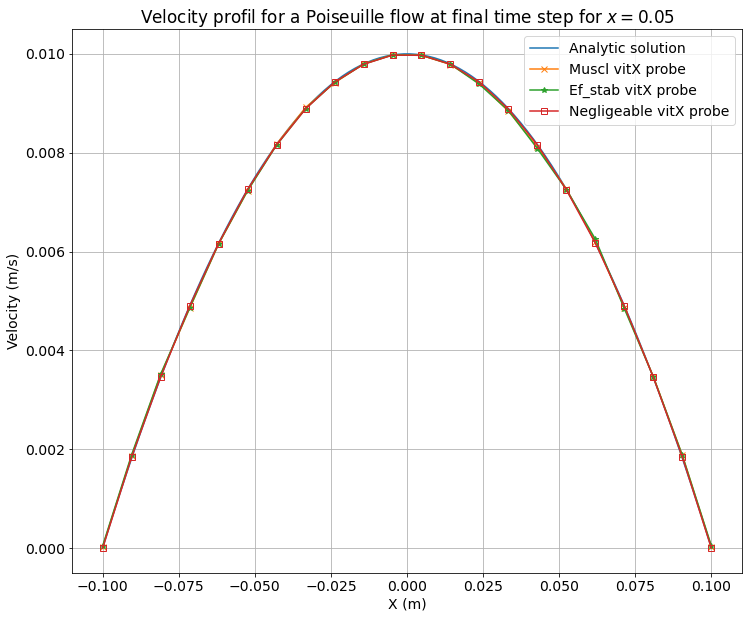

In [31]:
import numpy as np

a = plot.Graph("Velocity profil for a Poiseuille flow at final time step for $x=0.05$")
x = np.linspace(-0.1,0.1,100)
y = -0.01*(x*x-0.1*0.1)/(0.1*0.1)
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl_VITX.son",compo=0,label="Muscl vitX probe",marker="-x")
a.addSegment("PAR_VEF_P0P1_gx_ef_stab/PAR_VEF_P0P1_gx_ef_stab_VITX.son",compo=0,label="Ef_stab vitX probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_gx_negligeable/PAR_VEF_P0P1_gx_negligeable_VITX.son",compo=0,label="Negligeable vitX probe",marker='-s',mfc='None')
a.label("X (m)","Velocity (m/s)")

<!-- ### Pressure slice belong Y axis -->

In [63]:
# a = visit.Show("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl.lata","Pseudocolor","PRESSURE_TOT_ELEM_dom")
# a.up3D([0, 1, -0.08])
# a.normal3D([-0.65,0.1,0.75])
# a.slice(origin=[0,0,0],normal=[0,1,0])
# a.plot()

### Total pressure profile

In [33]:
run.dumpData("pression_tot_gx.txt",
            ["Predefini", 
             "Transformation", 
             "methode", 
             "formule", 
             "expression", 
             "localisation", 
             "elem", 
             "sources_reference", 
             "energie_cinetique_elem", 
             "sources", 
             "RefChamp", 
             "Pb_champ", 
             "pression_pa", 
             "nom_source", 
             "pression_hydrostatique", 
             "masse_volumique"])

 energie_cine_elem Predefini { Pb_champ pb energie_cinetique_elem }
 pressure_tot Transformation
 {
 methode formule expression 1 p_pa+energie_cine_elem
 localisation elem
 sources_reference { energie_cine_elem }
 sources 
 {
 RefChamp { Pb_champ pb pression_pa  nom_source p_pa } ,
 RefChamp { Pb_champ pb masse_volumique  nom_source rho } ,
 RefChamp { Pb_champ pb pression_hydrostatique   nom_source p_hydro }
 }
 }



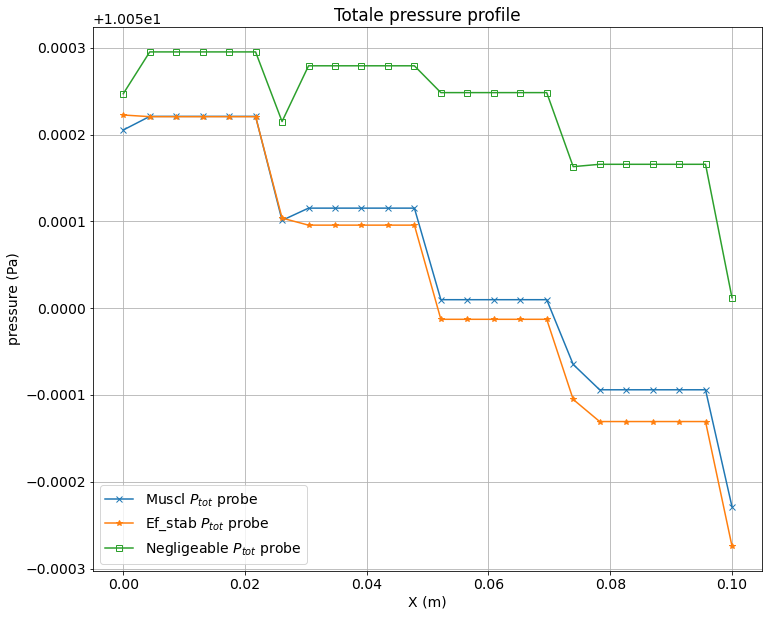

In [37]:
import numpy as np

a = plot.Graph("Totale pressure profile")
a.addSegment("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl_PTOT.son",label="Muscl $P_{tot}$ probe",marker="-x")
a.addSegment("PAR_VEF_P0P1_gx_ef_stab/PAR_VEF_P0P1_gx_ef_stab_PTOT.son",label="Ef_stab $P_{tot}$ probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_gx_negligeable/PAR_VEF_P0P1_gx_negligeable_PTOT.son",label="Negligeable $P_{tot}$ probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Pressure profil

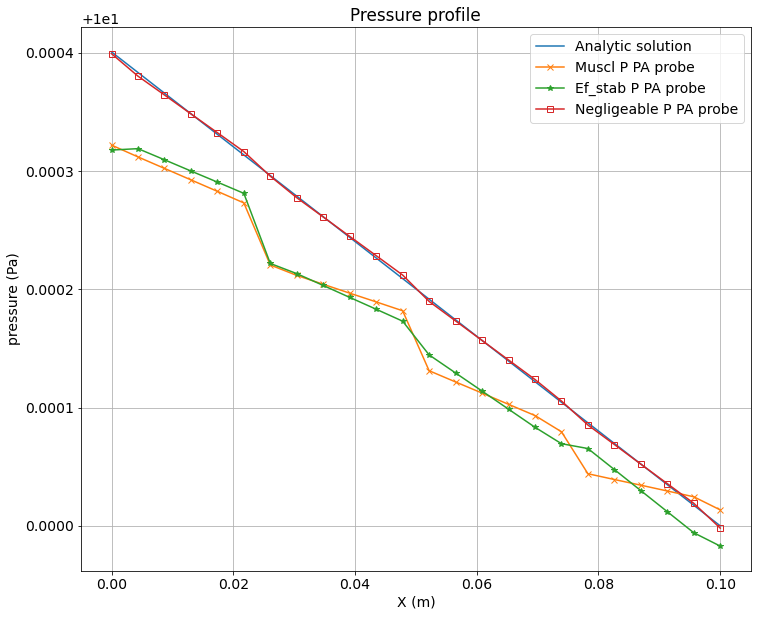

In [40]:
a = plot.Graph("Pressure profile")
x = np.linspace(0,0.1,100)
y = -4*0.001002*0.01*(x-0.1)/(0.1*0.1)+10
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl_P_PA.son",label="Muscl P PA probe",marker='-x')
a.addSegment("PAR_VEF_P0P1_gx_ef_stab/PAR_VEF_P0P1_gx_ef_stab_P_PA.son",label="Ef_stab P PA probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_gx_negligeable/PAR_VEF_P0P1_gx_negligeable_P_PA.son",label="Negligeable P PA probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Pressure hydrostatique profil

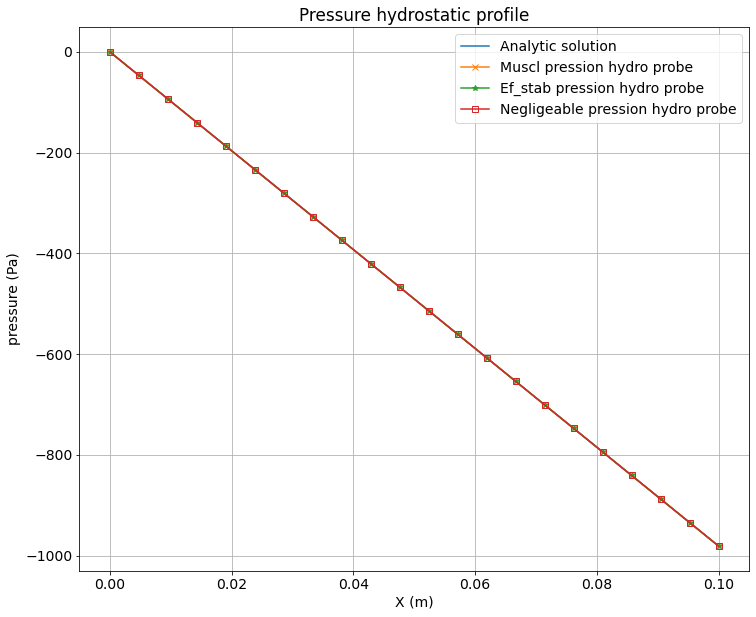

In [41]:
a = plot.Graph("Pressure hydrostatic profile")
x = np.linspace(0,0.1,100)
y = -1000*9.81*x
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl_PRESSION_HYDRO.son",label="Muscl pression hydro probe",marker='-x')
a.addSegment("PAR_VEF_P0P1_gx_ef_stab/PAR_VEF_P0P1_gx_ef_stab_PRESSION_HYDRO.son",label="Ef_stab pression hydro probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_gx_negligeable/PAR_VEF_P0P1_gx_negligeable_PRESSION_HYDRO.son",label="Negligeable pression hydro probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Kinetic energy profile

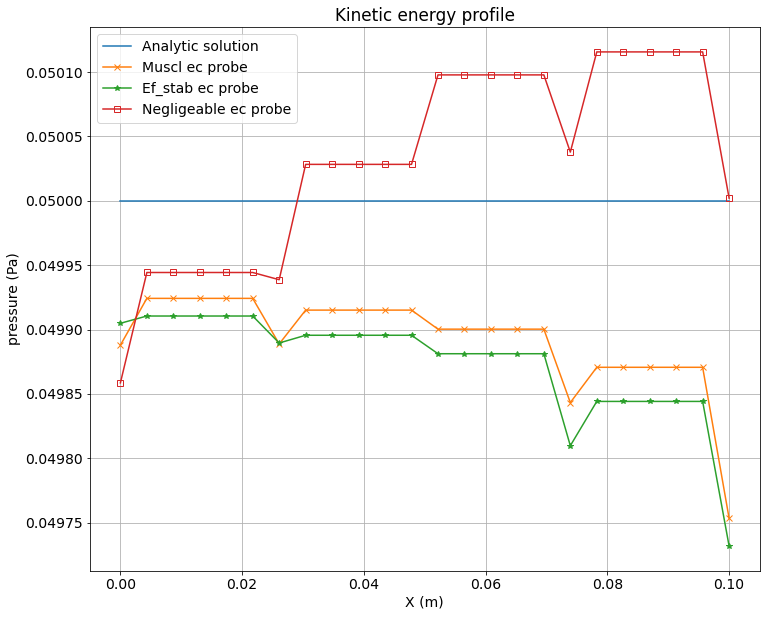

In [42]:
a = plot.Graph("Kinetic energy profile")
x = np.linspace(0,0.1,100)
y = [0.05]*100
a.add(x,y,label='Analytic solution')
a.addSegment("PAR_VEF_P0P1_gx_muscl/PAR_VEF_P0P1_gx_muscl_EC.son",label="Muscl ec probe",marker='-x')
a.addSegment("PAR_VEF_P0P1_gx_ef_stab/PAR_VEF_P0P1_gx_ef_stab_EC.son",label="Ef_stab ec probe",marker="-*")
a.addSegment("PAR_VEF_P0P1_gx_negligeable/PAR_VEF_P0P1_gx_negligeable_EC.son",label="Negligeable ec probe",marker="-s",mfc='None')
a.label("X (m)","pressure (Pa)")

### Pressure drop on the mean of the pressure at the inlet and outlet

In [43]:
from trustutils import plot

a = plot.Table(["$\Delta P$ Theoretical","$\Delta P$ TRUST","Error on $\Delta P$ in %"])

data = plot.loadText("PAR_VEF_P0P1_gx_muscl/propertiesGeometry.dat")
a.addLigne([[data[6],data[13],data[14]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_gx_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[6],data[13],data[14]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_gx_negligeable/propertiesGeometry.dat")
a.addLigne([[data[6],data[13],data[14]]],"Negligeable")

a.df

,$\Delta P$ Theoretical,$\Delta P$ TRUST,Error on $\Delta P$ in %
muscl,0.000401,0.000392,2.1208
Ef_Stab,0.000401,0.000355,11.5270
Negligeable,0.000401,0.000351,12.5000


### Pressure drop between the two symmetrical points of the probe 1

In [44]:
from trustutils import plot

a = plot.Table(["$\Delta P$ Theoretical","$\Delta P$ TRUST","Error on $\Delta P$ in %"])

data = plot.loadText("PAR_VEF_P0P1_gx_muscl/propertiesGeometry.dat")
a.addLigne([[data[6],data[7],data[8]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_gx_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[6],data[7],data[8]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_gx_negligeable/propertiesGeometry.dat")
a.addLigne([[data[6],data[7],data[8]]],"Negligeable")

a.df

,$\Delta P$ Theoretical,$\Delta P$ TRUST,Error on $\Delta P$ in %
muscl,0.000401,0.000434,8.2834
Ef_Stab,0.000401,0.000497,23.9270
Negligeable,0.000401,0.000235,41.3670


### Pressure drop between the two symmetrical points of the probe 3

In [45]:
from trustutils import plot

a = plot.Table(["$\Delta P$ Theoretical","$\Delta P$ TRUST","Error on $\Delta P$ in %"])

data = plot.loadText("PAR_VEF_P0P1_gx_muscl/propertiesGeometry.dat")
a.addLigne([[data[6],data[11],data[12]]],"muscl")

data = plot.loadText("PAR_VEF_P0P1_gx_ef_stab/propertiesGeometry.dat")
a.addLigne([[data[6],data[11],data[12]]],"Ef_Stab")

data = plot.loadText("PAR_VEF_P0P1_gx_negligeable/propertiesGeometry.dat")
a.addLigne([[data[6],data[11],data[12]]],"Negligeable")

a.df

,$\Delta P$ Theoretical,$\Delta P$ TRUST,Error on $\Delta P$ in %
muscl,0.000401,0.000377,5.9381
Ef_Stab,0.000401,0.000463,15.3940
Negligeable,0.000401,0.000267,33.4080


## Data Files

### PAR_VEF_P0P1_g_muscl

In [1]:
from trustutils import run

run.dumpDataset("PAR_VEF_P0P1_g_muscl/PAR_VEF_P0P1_g_muscl")

 dimension 3
 
 Pb_hydraulique pb
 domaine dom
 # Longueur 0.1 #
 # Rayon 0.1 #
 
 # BEGIN SCATTER #
 Scatter DOM.Zones dom
 # END SCATTER #
 
 VEFPreP1B dis
 Read dis
 {
     P0 P1 Cl_pression_sommet_faible 0 changement_de_base_p1bulle 1 modif_div_face_dirichlet 1
 }
 
 Schema_Euler_implicite sch
 Read sch
 {
     tinit 0
     tmax 3000
     dt_min 1.e-7
     dt_max 12.
     dt_impr 0.001
     dt_sauv 20.
     dt_start dt_calc
     seuil_statio 1.e-8
     facsec 400.
     facsec_max 400
     Solveur Implicite
     {
         seuil_convergence_solveur 1.e-15
         solveur gmres { diag seuil 1.e-15 impr controle_residu 1 nb_it_max 5 }
     }
 }
 
 Fluide_Incompressible fluide
 Read fluide
 {
     mu      Champ_Uniforme 1 1.002e-3
     rho     Champ_Uniforme 1 1000
 }
 
 Champ_Uniforme gravite
 Read gravite 3   0.   0.   -9.81
 Associate fluide gravite
 
 Associate pb dom
 Associate pb fluide
 Associate pb sch
 
 Discretize pb dis
 
 Domaine Inlet
 
 Domaine Outlet
 
 Read pb
 {
     